# Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

 

Domain:
Banking

 

Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

Attribute Information:
ID: Customer ID
Age: Customer's age in completed years
Experience: #years of professional experience
Income: Annual income of the customer ($000)
ZIP Code: Home Address ZIP
Family: Family size of the customer
CCAvg: Avg. spending on credit cards per month ($000)
Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
Mortgage: Value of house mortgage if any. ($000)
Personal Loan: Did this customer accept the personal loan offered in the last campaign?
Securities Account: Does the customer have a securities account with the bank?
CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
Online: Does the customer use internet banking facilities?
Credit card: Does the customer use a credit card issued by the bank?
 

Learning Outcomes:
Exploratory Data Analysis
Preparing the data to train a model
Training and making predictions using a classification model
Model evaluation
 

Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

 

## 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt       
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats

from sklearn.linear_model import LinearRegression
# Accuracy measures and confusion matrix
from sklearn import metrics

In [3]:
df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### ***Datatype, Statistical Summary, Shape, Null values***

In [4]:
df.shape

(5000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 546.9 KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
# Education, Personal loan, Security account, CD account, Online account and credit card seems to be categorical variables; 
# Experience has 52 negative values.

In [7]:
df[df['Experience'] < 0].shape # There are 52 negative experience values

(52, 14)

In [8]:
# Converting negative values of Experience into positive. It could be possible that there is a typo.
df['Experience'] = df['Experience'].abs() 

In [9]:
df[df['Experience'] < 0].shape

(0, 14)

In [10]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [11]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

###
Insights:
 No null values in the dataset

## 2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
Number of unique in each column?
Number of people with zero mortgage?
Number of people with zero credit card spending per month?
Value counts of all categorical columns.
Univariate and Bivariate.
Get data model ready

### ***Number of Unique values in each column***

In [12]:
df.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

### ***Number of people with zero mortgage***

In [13]:
df[df['Mortgage'] == 0].shape 

(3462, 14)

#### Insights: 
There are 3462 people with zero mortgage

### ***Number of people with zero credit card spending per month***

In [14]:
df[df['CCAvg'] == 0].shape 

(106, 14)

#### Insights: 
 There are 106 people with credit card spending zero

### ***Value counts of all categorical columns***

In [15]:
df['Personal Loan'].value_counts() 

0    4520
1     480
Name: Personal Loan, dtype: int64

In [16]:
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [17]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [18]:
df['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [19]:
df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

#### Insights:

 522 customers with Security Accounts;
 302 customers with certificate of deposit (CD) account with the bank;
 2984 customers use internet banking facilities; 
 1470 customers use credit card issued by the bank;

### ***Univariate and Bivariate Analysis***

In [20]:
df.groupby(["Personal Loan"]).mean()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,2512.165487,45.367257,20.165487,66.237389,93152.428761,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


In [21]:

df.groupby(['Personal Loan','Online','Education'])['Mortgage'].mean()

Personal Loan  Online  Education
0              0       1             61.851064
                       2             48.979253
                       3             47.102564
               1       1             57.109635
                       2             42.968877
                       3             46.438667
1              0       1            118.880952
                       2             89.032787
                       3             72.418605
               1       1            117.627451
                       2             92.628099
                       3            122.243697
Name: Mortgage, dtype: float64

In [22]:
df.groupby(['Personal Loan','Education'])['Income'].median()

Personal Loan  Education
0              1             75
               2             48
               3             51
1              1            139
               2            142
               3            149
Name: Income, dtype: int64

In [23]:
df.groupby(['Personal Loan','Education','Family'])['CCAvg'].mean()

Personal Loan  Education  Family
0              1          1         2.470762
                          2         2.707504
                          3         1.612298
                          4         1.320242
               2          1         1.534021
                          2         1.269442
                          3         1.241386
                          4         1.339633
               3          1         1.331902
                          2         1.350155
                          3         1.115721
                          4         1.569045
1              1          1         3.825556
                          2         3.400000
                          3         3.650000
                          4         3.360000
               2          1         3.334250
                          2         4.134000
                          3         4.452273
                          4         3.860833
               3          1         4.051724
                      

In [24]:
df.groupby(['Personal Loan','Education','CD Account'])['CCAvg'].mean()

Personal Loan  Education  CD Account
0              1          0             2.196823
                          1             2.313488
               2          0             1.347433
                          1             1.276970
               3          0             1.354701
                          1             1.500465
1              1          0             3.542623
                          1             3.510312
               2          0             3.968425
                          1             3.950909
               3          0             3.885855
                          1             4.418868
Name: CCAvg, dtype: float64

### Insights
Average spending per month (CCAVg) is higher for people who took personal loan

In [25]:
df.groupby(['Personal Loan','Education'])['Mortgage'].mean()

Personal Loan  Education
0              1             59.000999
               2             45.341523
               3             46.718364
1              1            118.193548
               2             91.423077
               3            101.341463
Name: Mortgage, dtype: float64

### Insights
People who took personal loan has higher Mortgage than people who did not take personal loan

In [26]:
df.groupby(['Personal Loan'])['CD Account'].value_counts()

Personal Loan  CD Account
0              0             4358
               1              162
1              0              340
               1              140
Name: CD Account, dtype: int64

In [27]:
df.groupby(['Personal Loan'])['Securities Account'].value_counts()

Personal Loan  Securities Account
0              0                     4058
               1                      462
1              0                      420
               1                       60
Name: Securities Account, dtype: int64

In [28]:
df.groupby(['Personal Loan','Education','Securities Account','CD Account'])['Income'].mean()

Personal Loan  Education  Securities Account  CD Account
0              1          0                   0              83.609881
                                              1              94.093750
                          1                   0              81.301282
                                              1              69.037037
               2          0                   0              52.462396
                                              1              45.411765
                          1                   0              50.819820
                                              1              56.437500
               3          0                   0              52.818891
                                              1              59.470588
                          1                   0              55.909091
                                              1              54.500000
1              1          0                   0             136.983333
                    

### Insights
People who took personal loan has higher income than people who did not take personal loan

In [29]:
df.groupby(['Personal Loan','Education','CreditCard'])['Mortgage'].mean()

Personal Loan  Education  CreditCard
0              1          0              61.498573
                          1              53.174709
               2          0              44.812142
                          1              46.669540
               3          0              47.027233
                          1              45.968254
1              1          0             126.196721
                          1             102.937500
               2          0              98.138462
                          1              74.634615
               3          0              83.198630
                          1             146.237288
Name: Mortgage, dtype: float64

In [30]:
df.groupby(['Personal Loan','Education','Family'])['Mortgage'].mean()

Personal Loan  Education  Family
0              1          1          59.352765
                          2          67.846861
                          3          54.533981
                          4          46.551075
               2          1          50.531469
                          2          50.558140
                          3          40.023599
                          4          43.233596
               3          1          47.853659
                          2          49.559006
                          3          42.873362
                          4          45.226866
1              1          1         129.111111
                          2          33.000000
                          3          99.875000
                          4         142.575000
               2          1          67.025000
                          2          92.160000
                          3          96.863636
                          4         106.000000
               3          1

### Insights:
People who took personal loan has higher income than people who did not take personal loan.
People with Family > 1 seems to have higher mortgage.


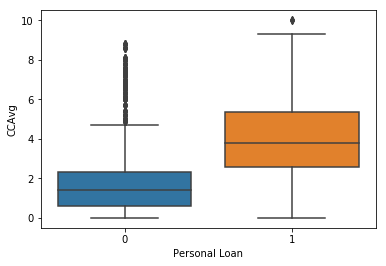

In [31]:
sns.boxplot(x="Personal Loan", y="CCAvg",data=df);

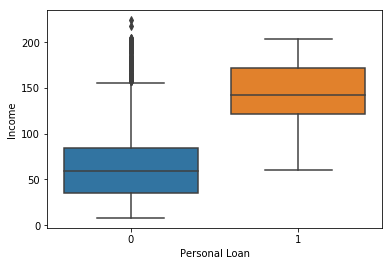

In [32]:
sns.boxplot(x="Personal Loan", y="Income",data=df);

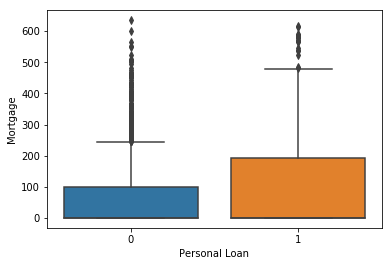

In [33]:
sns.boxplot(x="Personal Loan", y="Mortgage",data=df);

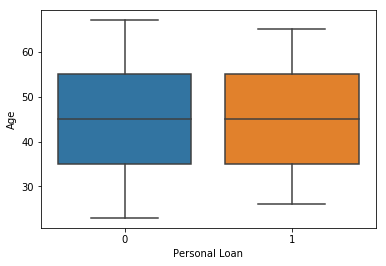

In [34]:
sns.boxplot(x="Personal Loan", y="Age",data=df);

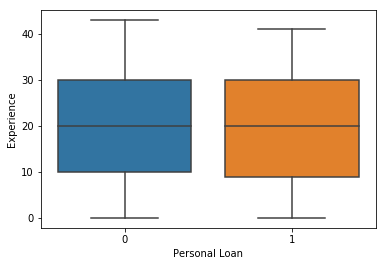

In [35]:
sns.boxplot(x="Personal Loan", y="Experience",data=df);

### Insights:
Based on Univariate and Bivariate analysis:
Personal loans were taken by people with higher education, income, mortgage, higher spending on credit card per month with age group of 35 to 55 years (mean = 45 years).
Factors such as having CD Account, Securites Account, Online banking, CreditCard and Experience have less impact on taking a personal loan.


In [36]:
## Identifying Correlation in data 
df.corr() 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008202,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.993991,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008202,0.993991,1.000000,-0.046876,-0.028936,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.017695,-0.055269,-0.046876,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028936,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.051851,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.049738,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013919,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.011097,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.008304,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [ ]:
df_graph=df.iloc[:,0:15]
sns.pairplot(df_graph,diag_kind='kde');

### Insights:
There is no clear linear relationship for any of the variables except for Age and Experience; Income and CCAvg has moderate linear relationship, more evident when income is higher.

### ***Getting the model ready***

In [39]:
n_true = len(df.loc[df['Personal Loan'] == True])
n_false = len(df.loc[df['Personal Loan'] == False])
print(n_true / float (n_true + n_false) * 100)
print(n_false / float (n_true + n_false) * 100)

9.6
90.4


### Insights
There is imbalance the data. There are 9.6 % people who took personal loan and 90.4% did not take personal loan.


In [5]:
# Converting negative values of Experience into positive. It could be possible that there is a typo. 
df['Experience'] = df['Experience'].abs() 

In [6]:
# Split the Data
# Independant variables: Dropping CreditCard, Online, Securities Account, ID and ZIP Code as they seem to have lower impact on taking a personal loan.
X = df.drop(['Personal Loan','CreditCard','Experience','ID','Online','Securities Account','ZIP Code'], axis=1)
# Dependent variable
y = df[['Personal Loan']].astype('category')

## 3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [7]:
# Split X and y into training and test set in 70:30 ratio; 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


## 4. Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)

In [8]:
# Logistic Regression Analysis 
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=1,solver='liblinear')
logreg.fit(X_train, y_train)                    # fitting the model on training data


/Users/madhuchavali/Library/Python/2.7/lib/python/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
y_predict = logreg.predict(X_test)  # Predicting on test set


In [10]:
model_score=logreg.score(X_test,y_test)
print(model_score)

0.942


In [11]:
print("{0:0.2f}% data is in training set".format((len(X_train)/float(len(df.index))) * 100)) # Checking the split of the data
print("{0:0.2f}% data is in test set".format((len(X_test)/float(len(df.index))) * 100))

70.00% data is in training set
30.00% data is in test set


In [12]:
# Confusion Matrix 
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True, cmap='rocket', fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Confusion Matrix


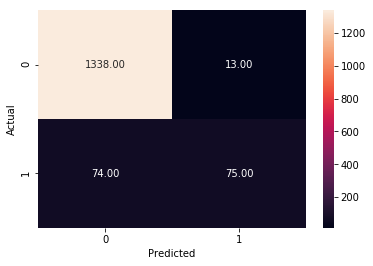

None
('Trainig accuracy:', 0.9437142857142857)
('Testing accuracy:', 0.942)
('Recall:', 0.5033557046979866)
('Precision:', 0.8522727272727273)
('F1 Score:', 0.6329113924050633)
('Roc_Auc_Score:', 0.7468666014237528)


In [13]:
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print("Trainig accuracy:",logreg.score(X_train,y_train))  
print("Testing accuracy:",logreg.score(X_test, y_test))
print("Recall:",recall_score(y_test,y_predict))
print("Precision:",precision_score(y_test,y_predict))
print("F1 Score:",f1_score(y_test,y_predict))
print("Roc_Auc_Score:",roc_auc_score(y_test,y_predict))

### Insights: 
True Positives: we correctly predicted that they will take personal loan = 81

True Negatives: we correctly predicted that they will not take personal loan = 1339

False Positives: we incorrectly predicted that they will take personal loan = 12

False Negatives: we incorrectly predicted that they will not take personal loan = 68

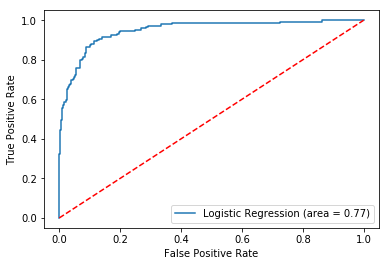

In [48]:
#AUC_ROC Curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## 5. Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)

In [49]:
## Coefficients 
Coef_Attributes = pd.DataFrame()
Coef_Attributes['Col'] = X_train.columns
Coef_Attributes['Coeff'] = np.round(abs(logreg.coef_[0]),2)
Coef_Attributes.sort_values(by='Coeff',ascending=False)

,Col,Coeff
7,CD Account,2.12
5,Education,1.64
3,Family,0.63
0,Age,0.40
1,Experience,0.40
4,CCAvg,0.15
2,Income,0.05
6,Mortgage,0.00


In [50]:
Difference_prediction = pd.concat([X_test.reset_index(drop=True), 
                     y_test.reset_index(), 
                     pd.Series(y_predict, name='Predicted')], axis=1)

d = Difference_prediction.loc[Difference_prediction['Personal Loan'] != Difference_prediction['Predicted']]
d.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,CD Account,index,Personal Loan,Predicted
8,51,27,112,3,1.8,2,0,1,932,0,1
42,65,41,78,3,2.0,3,0,1,3347,0,1
48,59,35,85,1,3.4,3,0,1,3988,1,0
51,52,27,93,4,4.1,2,0,0,3271,1,0
94,26,2,60,2,3.0,1,132,0,349,1,0


## 6. Give conclusion related to the Business understanding of your model? (5 marks)


 ## Business Insights

**Customer Accounts with the Bank:** 

522 customers have Security Accounts with the bank.
302 customers have certificate of deposit (CD) account with the bank.
2984 customers use internet banking facilities.
1470 customers use credit card issued by the bank.

**Customer Profiling:**

Based on univariate and bivariate analysis, personal loans were taken by people with higher education, income, mortgage, higher monthly expenditure on credit card, CD Account with age group of 35 to 55 years.
Factors such as having Online banking, Securities Account, CreditCard issued by bank and Experience didn't have a significant impact on taking a personal loan.

**Modeling Summary:** 

Model Score = 95%
Trainig accuracy = 95 % 
Testing accuracy = 95 % 
Recall = 54 % 
Precision = 87 %
F1 Score = 67 %
Roc_Auc_Score = 77% 

We correctly predicted that they will take personal loan = 81
We correctly predicted that they will not take personal loan = 1339
We incorrectly predicted that they will take personal loan = 12
We incorrectly predicted that they will not take personal loan = 68

As the there is imbalance in the data, Roc_Auc_Score with 77% is appropriate chose in predicting the model.  

**Customer Segmention:**
Based on the model and Exploratory data analysis, customers with CD Account with the bank, higher education, higher income, existing mortgage, and  higher monthly expenditure on credit card seems to be liability customers, who are more likely to take personal loan.

